# Evaluation notebook for comparing different models

This notebook provides two ways of comparing models

1. Visualization of precipitation propagation plots
2. Evaluation over custom datasets using predetermined metrics

In [1]:
from servir.utils.evaluation import evaluation
from servir.core.data_provider import IMERGDataModule
# Evaluation using servir library code

event_id = '3'
h5_dataset_location = '../data/events/'+event_id+'.h5'
ir_h5_dataset_location = None
metadata_location = '../data/events/'+event_id+'/metadata.json'
dataset_type = 'wa'
thr = 2
get_crps = False

data_provider =  IMERGDataModule(
        forecast_steps = 12,
        history_steps = 12,
        imerg_filename = h5_dataset_location,
        ir_filename = ir_h5_dataset_location,
        batch_size = 32,
        image_shape = (360, 516),
        normalize_data=False,
        dataset = dataset_type)

data_loader = data_provider.test_dataloader()

model_type = 'convlstm'
model_config_location = 'configs/wa_imerg/ConvLSTM.py'
model_save_location = 'temp/imerg_only_mse_params.pth'
use_gpu = False
convlstm_crps, convlstm_psd_dict, convlstm_csi_dict = evaluation(metadata_location, data_loader, thr, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)

model_type = 'steps'
model_config_location = 'configs/wa_imerg/PySTEPS.py'
model_save_location = ''
use_gpu = False
steps_crps, steps_psd_dict, steps_csi_dict = evaluation(metadata_location, data_loader, thr, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)

model_type = 'lagrangian'
model_config_location = 'configs/wa_imerg/lagrangian_persistence.py'
model_save_location = ''
use_gpu = False
lagrangian_crps, lagrangian_psd_dict, lagrangian_csi_dict = evaluation(metadata_location, data_loader, thr, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)

model_type = 'naive'
model_config_location = 'configs/wa_imerg/naive_persistence.py'
model_save_location = ''
use_gpu = False
naive_crps, naive_psd_dict, naive_csi_dict = evaluation(metadata_location, data_loader, thr, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id)



Pysteps configuration file found at: /volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/pysteps/pystepsrc



/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


original shape (49, 360, 516)
Precipitation Dataset input shape:  (26, 12, 1, 360, 516)
Precipitation Dataset output shape:  (26, 12, 1, 360, 516)
loading config from configs/wa_imerg/ConvLSTM.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
0


/vol_efthymios/NFS07/en279/SERVIR/TITO_test3/ML/nowcasting/servir/core/model_picker.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32, device= self.config['device'])


(360, 516)
1
(360, 516)
2
(360, 516)
3
(360, 516)
4
(360, 516)
5
(360, 516)
6
(360, 516)
7
(360, 516)
8
(360, 516)
9
(360, 516)
10
(360, 516)
11
(360, 516)
12
(360, 516)
13
(360, 516)
14
(360, 516)
15
(360, 516)
16
(360, 516)
17
(360, 516)
18
(360, 516)
19
(360, 516)
20
(360, 516)
21
(360, 516)
22
(360, 516)
23
(360, 516)
24
(360, 516)
25
(360, 516)
total errored out =  0
loading config from configs/wa_imerg/PySTEPS.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
Computing STEPS nowcast
-----------------------

Inputs
------
input dimensions: 360x516
km/pixel:         10
time step:        30 minutes

Methods
-------
extrapolation:          semilagrangian
bandpass filter:        gaussian
decomposition:          fft
noise generator:        nonparametric
noise adjustment:       no
velocity perturbator:   bps
conditional statistics: no
precip. mask method:    incremental
probability matching:   cdf
FFT method:             numpy
domain:                 spatial

Parameters
----------
number of time steps:     12
ensemble size:            1
parallel threads:         1
number of cascade levels: 6
order of the AR(p) model: 2
velocity perturbations, parallel:      10.88,0.23,-7.68
velocity perturbations, perpendicular: 5.76,0.31,-2.72
precip. intensity threshold: -10.0
************************************************
* Correlation coefficients for cascade levels: *
************************************************
--------

/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
(12, 360, 516)
total errored out =  0
loading config from configs/wa_imerg/naive_persistence.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.008963584899902344  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0028448104858398438  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0022346973419189453  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0030198097229003906  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.003272533416748047  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0022401809692382812  seconds
(12, 360, 516)
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.002215862274169922  second

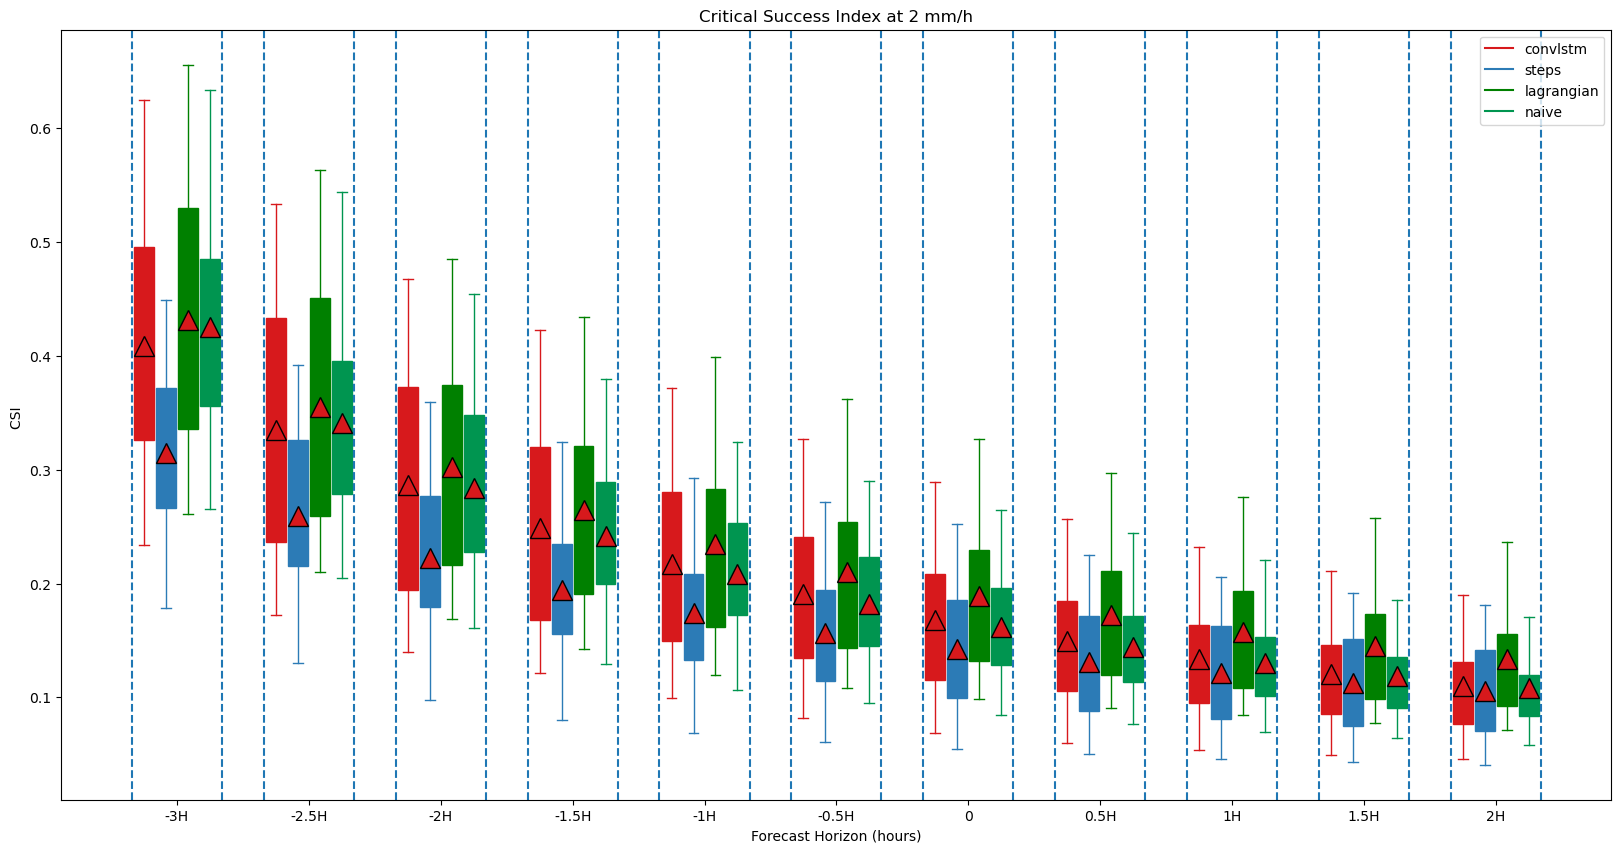

In [2]:
import numpy as np
from servir.utils.evaluation import csi_boxplot

event_id = '3'

convlstm_csi = np.load('results/convlstm_2_'+event_id+'_csi.npy', allow_pickle=True).item()
steps_csi = np.load('results/steps_2_'+event_id+'_csi.npy', allow_pickle=True).item()
lagrangian_csi = np.load('results/lagrangian_2_'+event_id+'_csi.npy', allow_pickle=True).item()
naive_csi = np.load('results/naive_2_'+event_id+'_csi.npy', allow_pickle=True).item()

csi_boxplot([convlstm_csi, steps_csi, lagrangian_csi, naive_csi], ['convlstm', 'steps', 'lagrangian', 'naive'], thr=2)


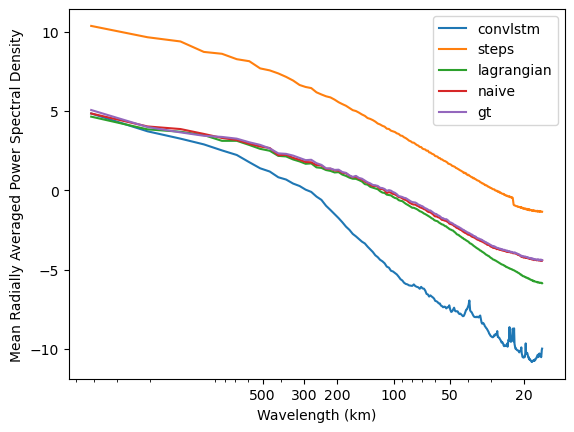

In [3]:
import numpy as np
from servir.utils.evaluation import rapsd_boxplot

event_id = '3'
convlstm_rapsd = np.load('results/convlstm_'+event_id+'_rapsd.npy', allow_pickle=True).item()
steps_rapsd  = np.load('results/steps_'+event_id+'_rapsd.npy', allow_pickle=True).item()
lagrangian_rapsd  = np.load('results/lagrangian_'+event_id+'_rapsd.npy', allow_pickle=True).item()
naive_rapsd  = np.load('results/naive_'+event_id+'_rapsd.npy', allow_pickle=True).item()
gt_rapsd  = np.load('results/gt_rapsd.npy', allow_pickle=True).item()


rapsd_boxplot([convlstm_rapsd, steps_rapsd, lagrangian_rapsd, naive_rapsd, gt_rapsd], ['convlstm', 'steps', 'lagrangian', 'naive', 'gt'], s=8)


## Evaluation for ensemble predictions

In [2]:
from servir.core.model_picker import ModelPicker
from pysteps.verification.probscores import CRPS
import numpy as np
import torch

model_type = 'steps'
model_config_location = 'configs/gh_imerg/PySTEPS.py'
model_save_location = None
use_gpu = False

# model_type = 'linda'
# model_config_location = 'configs/gh_imerg/LINDA.py'
# model_save_location = None
# use_gpu = False

# model_type = 'dgmr'
# model_config_location = 'configs/gh_imerg/DGMR.py'
# model_save_location = 'temp/DGMR-epoch=13.ckpt'
# use_gpu = False

# model_type = 'dgmr_ir'
# model_config_location = 'configs/gh_imerg/DGMR.py'
# model_save_location = 'temp/DGMR_IR-epoch=01.ckpt'
# use_gpu = False


model_picker = ModelPicker(model_type, model_config_location,model_save_location, use_gpu)
model_picker.load_model()

for index, data_sample_batch in enumerate(data_loader):
    x, x_ir, y = data_sample_batch
    print("starting predictions for batch {}".format(index))
    if model_type in ['steps', 'lagrangian', 'naive', 'linda']:
        x = x.numpy()[:,:,0,:,:]
        y = y.numpy()[:,:,0,:,:]

        for data_sample_index in range(len(x)):
            try:
                predicted_output = model_picker.predict(x[data_sample_index])
                for j in range(12):
                    crps_dict[model_type][str(j)].append(CRPS(predicted_output[:,0:j,: ], y[data_sample_index][0:j]))
            except:
                pass
    elif model_type in ['dgmr']:
        predicted_output = torch.tensor(model_picker.predict(x))
        rearanged_output = predicted_output.numpy().transpose(1, 0, 2, 3, 4, 5)[:,:,:,0,:,:]
        for data_sample_index in range(len(rearanged_output)):
            output = rearanged_output[data_sample_index]
            for j in range(12):
                crps_dict[model_type][str(j)].append(CRPS(output[:,0:j,:,:], y.numpy()[:,:,0,:,:][data_sample_index][0:j,:,:]))
            
    elif model_type in ['dgmr_ir']:
        predicted_output = torch.tensor(model_picker.predict(x, x_ir))
        print(predicted_output.shape)

        rearanged_output = predicted_output.numpy().transpose(1, 0, 2, 3, 4, 5)[:,:,:,0,:,:]
        for data_sample_index in range(len(rearanged_output)):
            output = rearanged_output[data_sample_index]
            for j in range(12):
                crps_dict[model_type][str(j)].append(CRPS(output[:,0:j,:,:], y.numpy()[:,:,0,:,:][data_sample_index][0:j,:,:]))
    if index == 4:
        break

Pysteps configuration file found at: /volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/pysteps/pystepsrc



/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading config from configs/gh_imerg/PySTEPS.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)
/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tenso

starting predictions for batch 0
Computing STEPS nowcast
-----------------------

Inputs
------
input dimensions: 64x64
km/pixel:         10
time step:        30 minutes

Methods
-------
extrapolation:          semilagrangian
bandpass filter:        gaussian
decomposition:          fft
noise generator:        nonparametric
noise adjustment:       no
velocity perturbator:   bps
conditional statistics: no
precip. mask method:    incremental
probability matching:   cdf
FFT method:             numpy
domain:                 spatial

Parameters
----------
number of time steps:     12
ensemble size:            20
parallel threads:         1
number of cascade levels: 6
order of the AR(p) model: 2
velocity perturbations, parallel:      10.88,0.23,-7.68
velocity perturbations, perpendicular: 5.76,0.31,-2.72
precip. intensity threshold: -10.0
************************************************
* Correlation coefficients for cascade levels: *
************************************************
---------

/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/pysteps/utils/cleansing.py:241: UserWarning: Singular matrix during outlier detection
  warnings.warn(f"{err} during outlier detection")


done.
Computing nowcast for time step 2... done.
Computing nowcast for time step 3... done.
Computing nowcast for time step 4... done.
Computing nowcast for time step 5... done.
Computing nowcast for time step 6... done.
Computing nowcast for time step 7... done.
Computing nowcast for time step 8... done.
Computing nowcast for time step 9... done.
Computing nowcast for time step 10... done.
Computing nowcast for time step 11... done.
Computing nowcast for time step 12... done.
Computing STEPS nowcast
-----------------------

Inputs
------
input dimensions: 64x64
km/pixel:         10
time step:        30 minutes

Methods
-------
extrapolation:          semilagrangian
bandpass filter:        gaussian
decomposition:          fft
noise generator:        nonparametric
noise adjustment:       no
velocity perturbator:   bps
conditional statistics: no
precip. mask method:    incremental
probability matching:   cdf
FFT method:             numpy
domain:                 spatial

Parameters
------

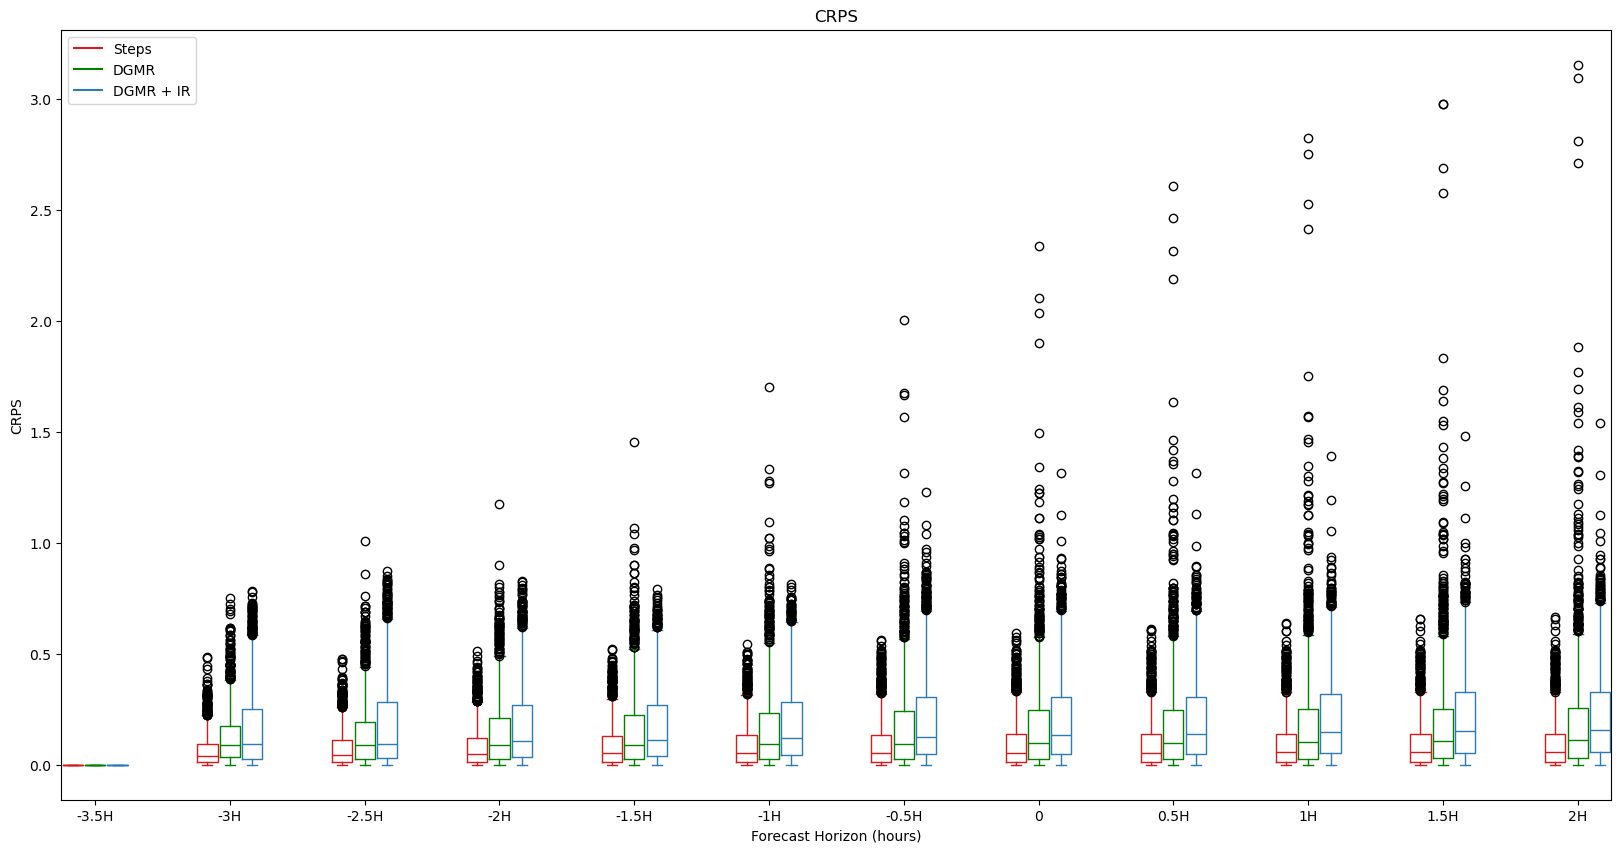

In [78]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(figsize=(20,10)) 
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
for i in range(12):
    # sns.boxplot(x = i*np.ones_like(vals[i]), y = vals[i])
    bp_cnv_lstm = plt.boxplot([np.nan_to_num(steps_crps_dict[str(i)])],widths = 0.9,  positions=[0+i*6])
    set_box_color(bp_cnv_lstm, '#D7191C')
    bp_cnv_lstm_relu = plt.boxplot([np.nan_to_num(dgmr_crps_dict[str(i)])],widths = 0.9,  positions=[1+i*6])
    set_box_color(bp_cnv_lstm_relu, '#008000')
    bp_naive = plt.boxplot([np.nan_to_num(dgmr_ir_crps_dict[str(i)])],widths = 0.9,  positions=[2+i*6])
    set_box_color(bp_naive, '#2C7BB6')

# plt.xticks(range(1, 12 * 6 + 1, 6), [str(i/2 + 0.5) for i in range(12)])

plt.xticks(range(1, 12 * 6 + 1, 6),['-3.5H','-3H','-2.5H','-2H','-1.5H','-1H','-0.5H','0','0.5H','1H','1.5H','2H'])

plt.plot([], c='#D7191C', label='Steps')
plt.plot([], c='#008000', label='DGMR')
plt.plot([], c='#2C7BB6', label='DGMR + IR')

plt.xlabel("Forecast Horizon (hours)")
plt.ylabel("CRPS")
plt.title("CRPS")

plt.legend()

plt.savefig('results/crps.png', dpi=300)

## Visualization example

In [2]:
from servir.utils.evaluation import evaluation, generate_outputs
from servir.core.data_provider import IMERGDataModule
# Evaluation using servir library code

event_id = '3'
h5_dataset_location = '../data/events/'+event_id+'.h5'
ir_h5_dataset_location = None
metadata_location = '../data/events/'+event_id+'/metadata.json'
dataset_type = 'wa'
thr = 2
get_crps = False


data_provider =  IMERGDataModule(
        forecast_steps = 12,
        history_steps = 12,
        imerg_filename = h5_dataset_location,
        ir_filename = ir_h5_dataset_location,
        batch_size = 32,
        image_shape = (360, 516),
        normalize_data=False,
        dataset = dataset_type)

data_loader = data_provider.test_dataloader()

model_type = 'convlstm'
model_config_location = 'configs/wa_imerg/ConvLSTM.py'
model_save_location = 'temp/imerg_only_mse_params.pth'
use_gpu = False
model_output_location = 'results/'
convlstm_output = generate_outputs(data_loader, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id,model_output_location = model_output_location)

model_type = 'steps'
model_config_location = 'configs/wa_imerg/PySTEPS.py'
model_save_location = ''
use_gpu = False
model_output_location = 'results/'
steps_output = generate_outputs(data_loader, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id,model_output_location = model_output_location)

model_type = 'lagrangian'
model_config_location = 'configs/wa_imerg/lagrangian_persistence.py'
model_save_location = ''
use_gpu = False
model_output_location = 'results/'
lagrangian_output = generate_outputs(data_loader, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id,model_output_location = model_output_location)

model_type = 'naive'
model_config_location = 'configs/wa_imerg/naive_persistence.py'
model_save_location = ''
use_gpu = False
model_output_location = 'results/'
naive_output = generate_outputs(data_loader, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id,model_output_location = model_output_location)


model_type = 'linda'
model_config_location = 'configs/wa_imerg/LINDA.py'
model_save_location = ''
use_gpu = False
model_output_location = 'results/'
naive_output = generate_outputs(data_loader, model_type, model_config_location, model_save_location, use_gpu, use_ensemble=False, event_name = event_id,model_output_location = model_output_location)


original shape (49, 360, 516)
Precipitation Dataset input shape:  (26, 12, 1, 360, 516)
Precipitation Dataset output shape:  (26, 12, 1, 360, 516)
loading config from configs/wa_imerg/ConvLSTM.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
0


/vol_efthymios/NFS07/en279/SERVIR/TITO_test3/ML/nowcasting/servir/core/model_picker.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32, device= self.config['device'])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
loading config from configs/wa_imerg/PySTEPS.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
Computing STEPS nowcast
-----------------------

Inputs
------
input dimensions: 360x516
km/pixel:         10
time step:        30 minutes

Methods
-------
extrapolation:          semilagrangian
bandpass filter:        gaussian
decomposition:          fft
noise generator:        nonparametric
noise adjustment:       no
velocity perturbator:   bps
conditional statistics: no
precip. mask method:    incremental
probability matching:   cdf
FFT method:             numpy
domain:                 spatial

Parameters
----------
number of time steps:     12
ensemble size:            1
parallel threads:         1
number of cascade levels: 6
order of the AR(p) model: 2
velocity perturbations, parallel:      10.88,0.23,-7.68
velocity perturbations, perpendicular: 5.76,0.31,-2.72
precip. intensity threshold: -10.0
************************************************
* Correlation coefficients for cascade levels: *
************************************************
--------

/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
loading config from configs/wa_imerg/naive_persistence.py ...


/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


starting predictions for batch 0
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.009262800216674805  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0024271011352539062  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0025022029876708984  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.002759218215942383  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0027718544006347656  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.002419710159301758  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields took  0.0027115345001220703  seconds
The shape of the resulting array is:  (12, 360, 516)
Advecting the radar rainfall fields

### Load the generated outputs

In [1]:
import numpy as np

event_name = '3'

convlstm_output = np.load('results/convlstm_'+event_name+'_outputs.npy')
steps_output = np.load('results/steps_'+event_name+'_outputs.npy')
lagrangian_output = np.load('results/lagrangian_'+event_name+'_outputs.npy')
naive_output = np.load('results/naive_'+event_name+'_outputs.npy')

### Generate gifs

Pysteps configuration file found at: /volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/pysteps/pystepsrc



/volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


original shape (49, 360, 516)
Precipitation Dataset input shape:  (26, 12, 1, 360, 516)
Precipitation Dataset output shape:  (26, 12, 1, 360, 516)


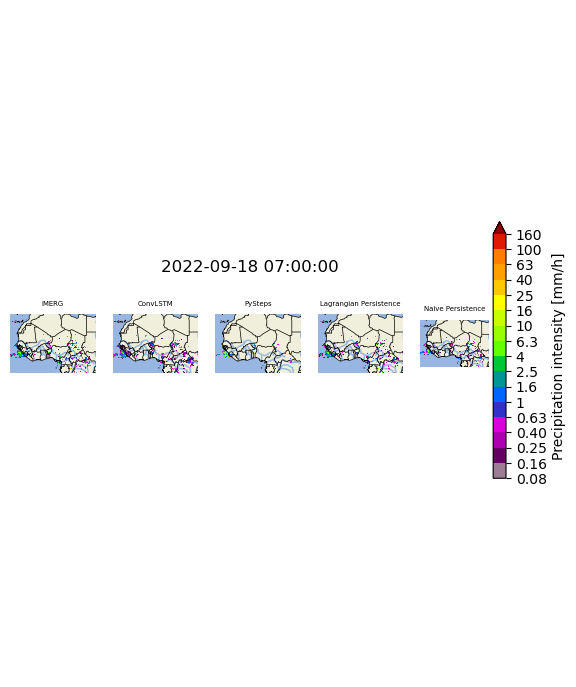

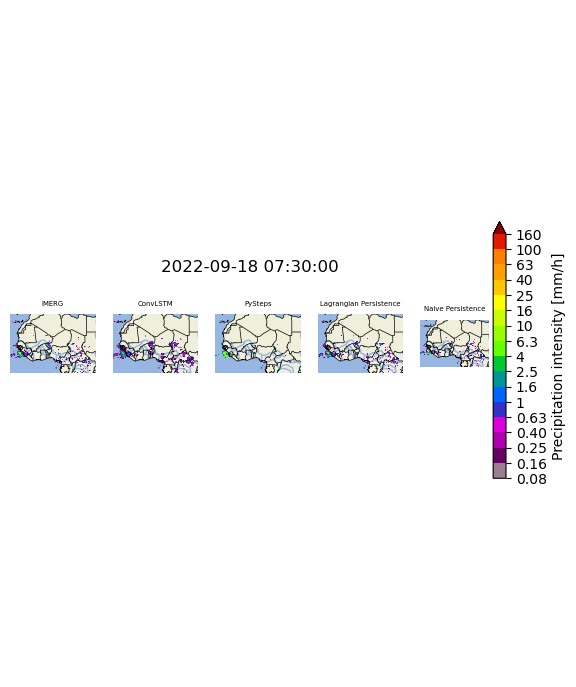

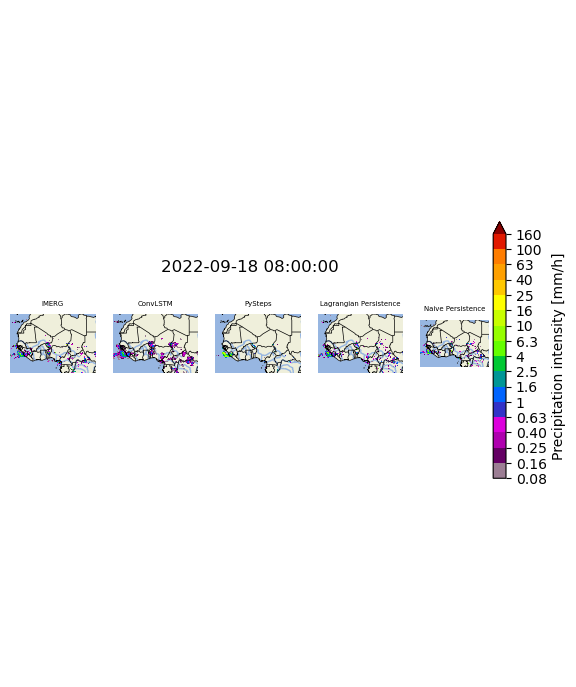

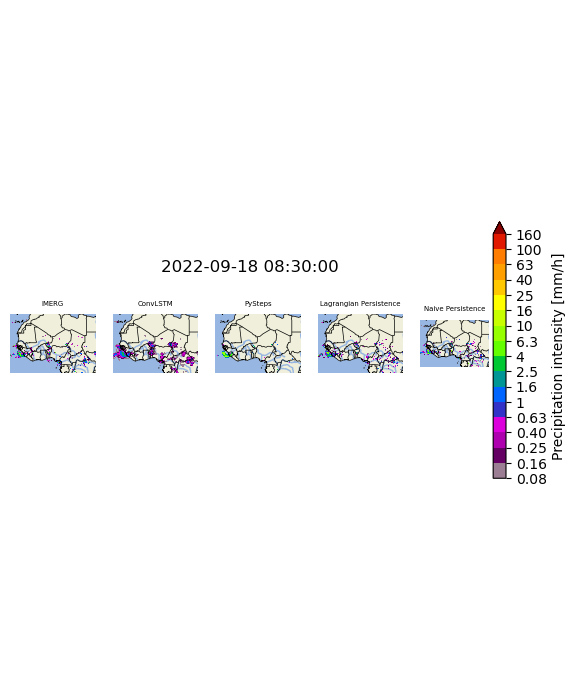

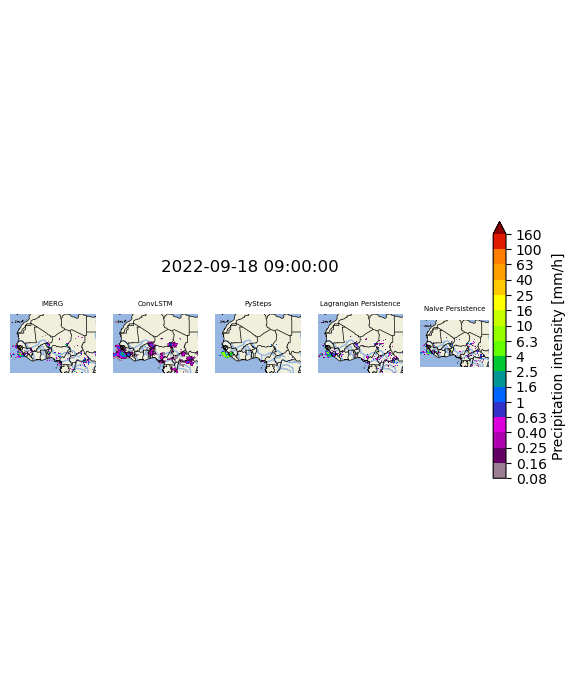

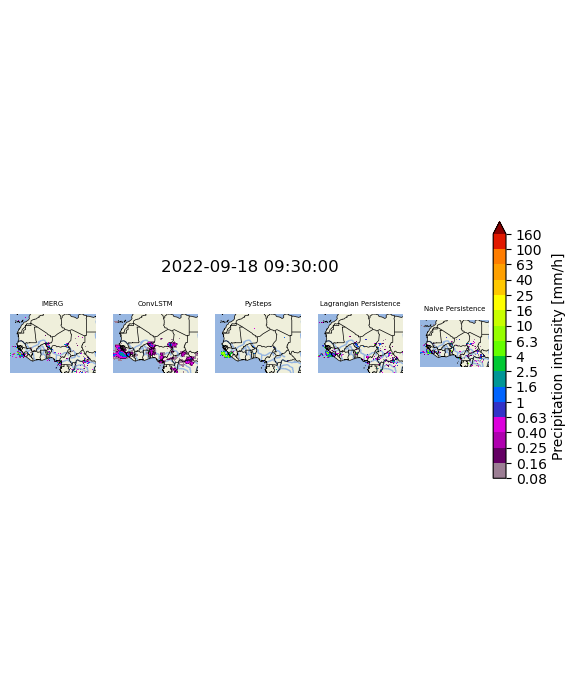

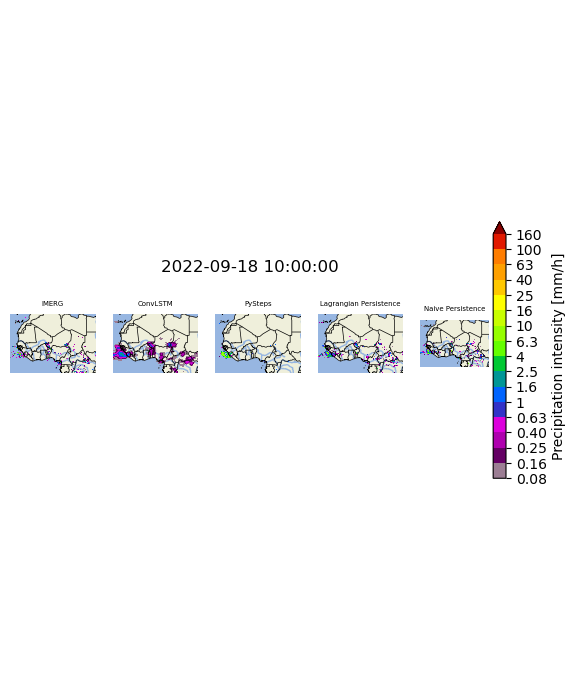

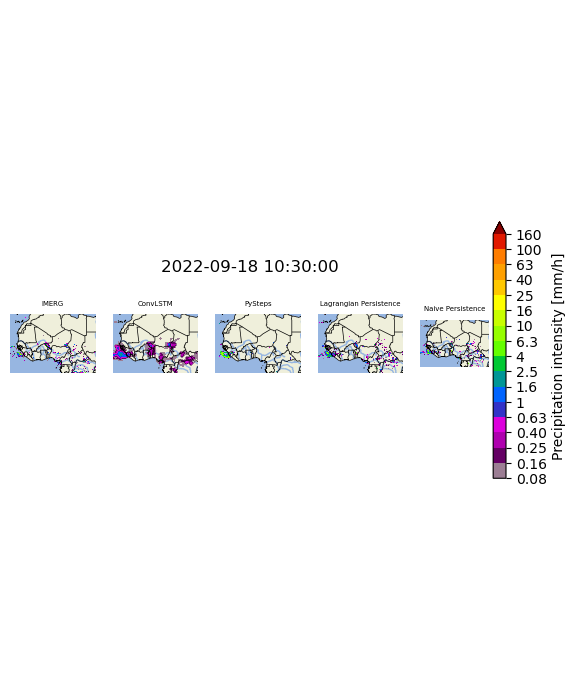

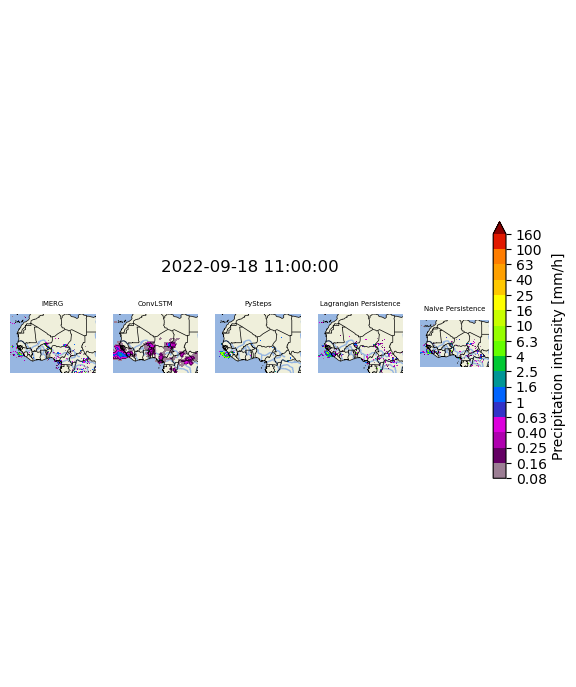

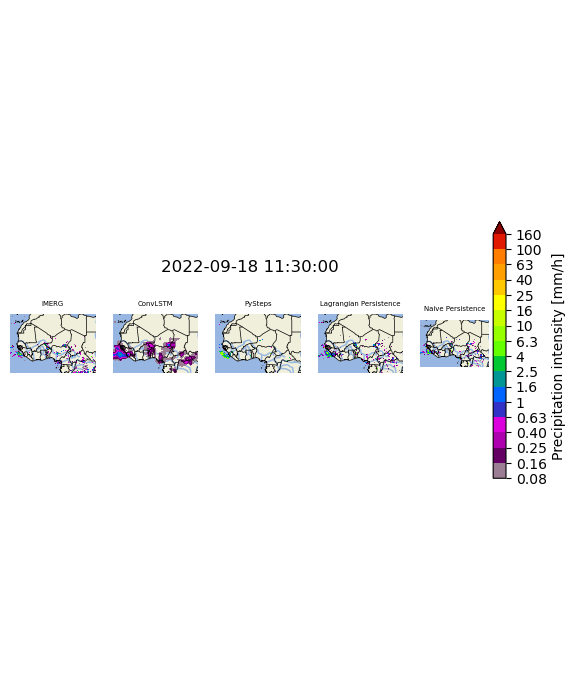

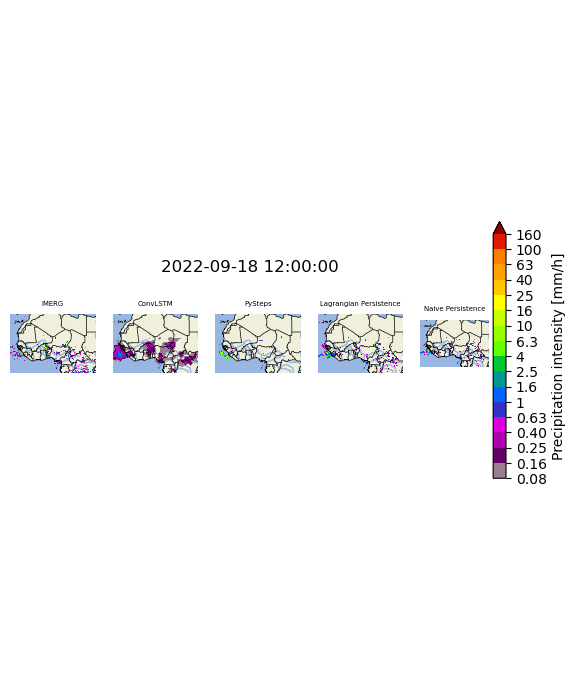

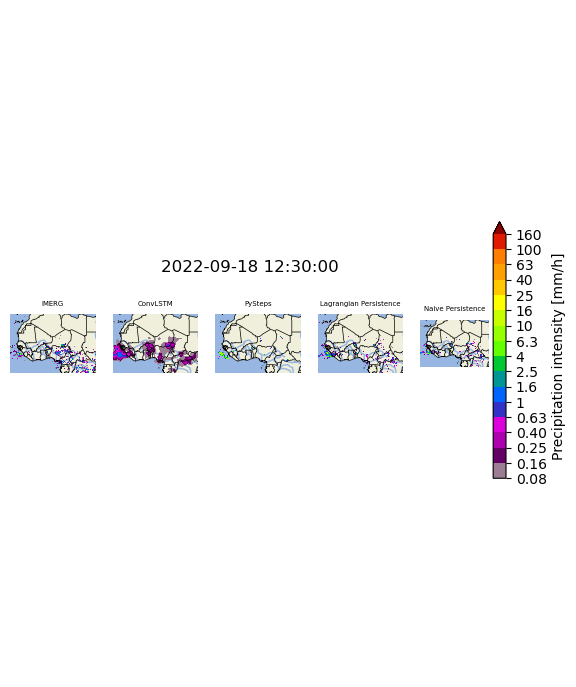

In [2]:
from servir.visualizations.gif_creation import create_precipitation_gif_multiple_comparison
import json
from servir.utils.evaluation import evaluation
from servir.core.data_provider import IMERGDataModule

prediction_timestep = 1

event_id = '3'
h5_dataset_location = '../data/events/'+event_id+'.h5'
ir_h5_dataset_location = None
metadata_location = '../data/events/'+event_id+'/metadata.json'
dataset_type = 'wa'
data_provider =  IMERGDataModule(
        forecast_steps = 12,
        history_steps = 12,
        imerg_filename = h5_dataset_location,
        ir_filename = ir_h5_dataset_location,
        batch_size = 32,
        image_shape = (360, 516),
        normalize_data=False,
        dataset = dataset_type)

data_loader = data_provider.test_dataloader()

with open(metadata_location) as jsonfile:
    geodata_dict = json.loads(jsonfile.read())


timestamps_obs = data_provider.test_dataset.get_output_timestamps()[prediction_timestep]
gt_output = data_provider.test_dataset.get_output_precipitation()

create_precipitation_gif_multiple_comparison([gt_output[prediction_timestep], convlstm_output[prediction_timestep], steps_output[prediction_timestep],
                                              lagrangian_output[prediction_timestep], naive_output[prediction_timestep]], 
                                             labels = ['IMERG', 'ConvLSTM', 'PySteps', 'Lagrangian Persistence', 'Naive Persistence'],
                                             timestamps_obs = timestamps_obs, 
                                             timestep_min = 30, 
                                             geodata = geodata_dict, 
                                             path_outputs = 'results/', 
                                             title=event_id +'_'+ str(prediction_timestep), 
                                             gif_dur = 200)


In [4]:
gt_output[prediction_timestep].shape

(12, 360, 516)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json


metadata_location = "../data/events/1/metadata.json"

with open(metadata_location) as jsonfile:
    geodata_dict = json.loads(jsonfile.read())
    
# data = np.load('results/outputs.npy', allow_pickle=True)
# gt_data = np.load('results/gt_outputs.npy', allow_pickle=True)
results_folder = "temp/"
model_to_use = "DGMR"
model_filename = results_folder+model_to_use+".h5"
model_to_use = "DGMR_IR"
model_filename_ir = results_folder+model_to_use+".h5"

gt_input_filename = results_folder+"gt_inputs.h5"
gt_output_filename = results_folder+"gt_outputs.h5"


with h5py.File(model_filename, 'r') as hf:
    data = hf['precipitations'][:].astype(np.float16)
    
with h5py.File(model_filename_ir, 'r') as hf:
    data_ir = hf['precipitations'][:].astype(np.float16)


with h5py.File(gt_output_filename, 'r') as hf:
    gt_data = hf['precipitations'][:].astype(np.float16)
    
with h5py.File(gt_input_filename, 'r') as hf:
    input_data = hf['precipitations'][:].astype(np.float16)
    input_data_ir = hf['precipitations_ir'][:].astype(np.float16)

<Figure size 640x480 with 0 Axes>

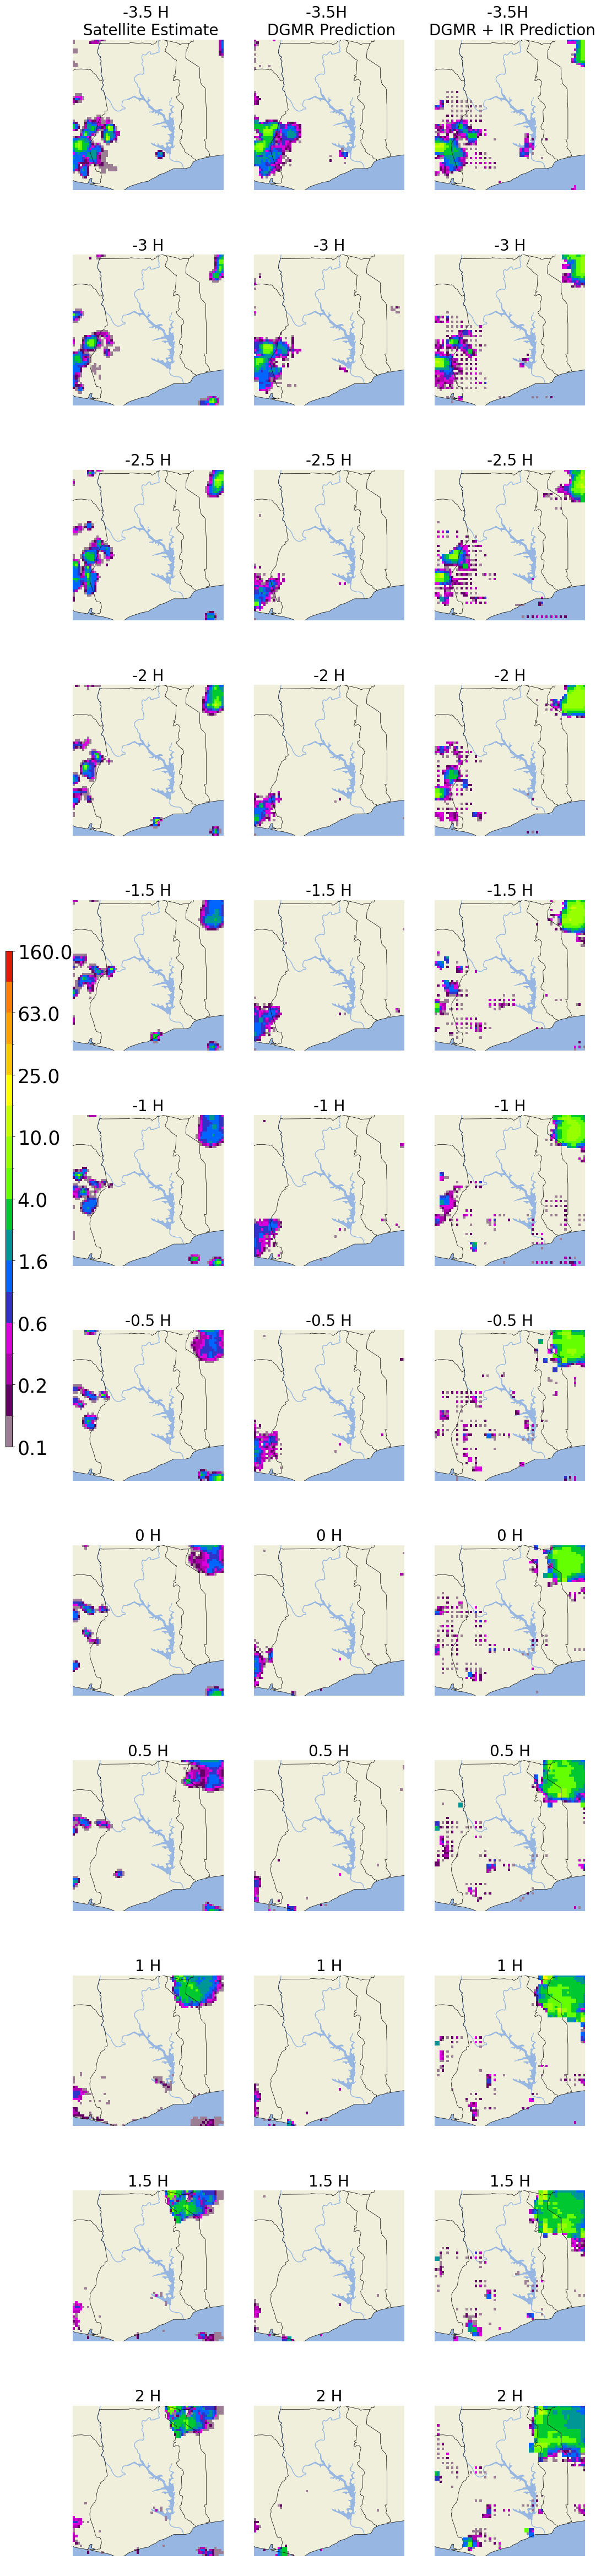

In [58]:
import matplotlib
import matplotlib.pyplot as plt
from pysteps.visualization.precipfields import plot_precip_field
from PIL import Image
img = Image.open('temp.png')

plt.clf()
global_min_non_zero_precipitation_intensity = 0.0 # mm/h
global_max_precipitation_intensity = 20.0 # mm/h
geodata_dict['yorigin'] = 'upper'


    
img_size = (64,64)
# Assumes the input dimensions are lat/lon
# nlat, nlon = img_size

# x_grid, y_grid, extent, regular_grid, origin = get_geogrid(
#     nlat, nlon, geodata=geodata_dict
# )

cmap_custom = matplotlib.cm.Blues
captions = [ -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, +0.5, +1, +1.5, +2]
# Use white color for pixels whose intensity is below 
# global_min_non_zero_precipitation_intensity.
# Use pink color for pixels whose intensity is above 
# global_max_precipitation_intensity.
cmap_custom.set_under('white') 
cmap_custom.set_over('pink')


# fig, axarr = plt.subplots(12,2, figsize = (36, 256), gridspec_kw = {'wspace':0.07, 'hspace':-0.5})

fig = plt.figure(figsize = (12, 60))

image_index = 666


# data[data < 0] = 0
# gt_data = y[:,:,0,:,:][0]
# input_data = x[:,:,0,:,:][0]


for i in range(0,12):
    # axarr[i+1][0].imshow(img, alpha=0.5)
    # im = axarr[i+1][0].imshow(img, alpha=0.25,aspect='auto' )
    # ax = fig.add_subplot(821 + ((i+1)*2))
    # im = axarr[i+1][0].imshow(gt_data[i], animated=False, cmap=cmap_custom,alpha=0.95)
    plt.subplot(12,3,3*i+1)
    plt.axis('off')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # fig.patch.set_visible(True)
    # ax.get_xaxis().set_ticks([])
    # ax.get_yaxis().set_ticks([])
    ax = plot_precip_field(gt_data[image_index][i][0], geodata=geodata_dict, colorbar=False, axis='off')
    
    if i == 0:
        title_string_1 = str(captions[i]) + " H \n Satellite Estimate"
        title_string_2 = str(captions[i]) + "H \n DGMR Prediction"
        title_string_3 = str(captions[i]) + "H \n DGMR + IR Prediction"
    else:
        title_string_1 = str(captions[i]) + " H"
        title_string_2 = str(captions[i]) + " H"
        title_string_3 = str(captions[i]) + " H"
    
    ax.set_title(title_string_1 , fontsize=20)
    # ax = fig.add_subplot(822 + ((i+1)*2))
    # ax.axis('off')
    # # ax.get_xaxis().set_ticks([])
    # # ax.get_yaxis().set_ticks([])
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # fig.patch.set_visible(True)
    plt.subplot(12,3,3*(i) + 2)
    plt.axis('off')
    ax = plot_precip_field(data[image_index][i][0], geodata=geodata_dict, colorbar=False, axis='off')
    
    ax.set_title(title_string_2 , fontsize=20)
    
    plt.subplot(12,3,3*(i) + 3)
    plt.axis('off')
    ax = plot_precip_field(data_ir[image_index][i][0], geodata=geodata_dict, colorbar=False, axis='off')
    ax.set_title(title_string_3 , fontsize=20)
    
    # im = axarr[i+1][2].imshow(data_ir[image_index][i][0], animated=False, cmap=cmap_custom)
    # axarr[i+1][2].set_title(title_string_3 , fontsize=70)
    
# fig.suptitle('Time steps $T_{'+str(captions[0])+' H}$ to $T_{'+str(captions[-1])+' H}$', fontsize=50,y=0.38)

# axarr[0][0].imshow(input_data[image_index][-1][0], animated=False, cmap=cmap_custom)
# axarr[0][1].imshow(input_data[image_index][-1][0], animated=False, cmap=cmap_custom)
# axarr[0][2].imshow(input_data[image_index][-1][0], animated=False, cmap=cmap_custom)

cax = fig.add_axes([0.023, 0.45, 0.01, 0.15])
cbar = fig.colorbar(ax.get_images()[0],cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=25)

plt.savefig('results_highres.png', bbox_inches="tight", dpi=300)

plt.show()
plt.close()

## Plots for presentation

The following plot generates a single gif for a single event

In [ ]:
import h5py
import numpy as np
import json
import datetime

h5_location = '../data/events/1.h5'
metadata_location = "../data/events/1/metadata.json"

with h5py.File(h5_location, 'r') as hf:
    
    precipitations = hf['precipitations'][:].astype(np.float32)
    timestamps = hf['timestamps'][:]
    timestamps = [datetime.datetime.strptime(x.decode(), '%Y-%m-%d %H:%M:%S') for x in timestamps]
    
print(precipitations.shape)
with open(metadata_location) as jsonfile:
    geodata_dict = json.loads(jsonfile.read())

print(geodata_dict)
from servir.visualizations.gif_creation import create_precipitation_gif
create_precipitation_gif(precipitations=precipitations,timestamps_obs=timestamps, 
                        timestep_min=30, geodata=geodata_dict, 
                        path_outputs='results', title='Hadeja, Nigeria Flooding', gif_dur = 200)


(49, 360, 518)
{'nx': 518, 'ny': 360, 'gt': [-21.4, 0.1, 0.0, 33.1, 0.0, -0.1], 'proj': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]', 'projection': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]', 'x1': -21.4, 'y1': -2.9, 'x2': 30.4, 'y2': 33.1, 'yorigin': 'upper'}
Pysteps configuration file found at: /volume/NFS/aa3328/miniconda3/envs/tito_env/lib/python3.12/site-packages/pysteps/pystepsrc

